In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [6]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7681 - loss: 0.1556 - val_accuracy: 0.8845 - val_loss: 0.0847
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9408 - loss: 0.0474 - val_accuracy: 0.8796 - val_loss: 0.0911
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9658 - loss: 0.0301 - val_accuracy: 0.8742 - val_loss: 0.0991
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9764 - loss: 0.0215 - val_accuracy: 0.8715 - val_loss: 0.1076
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9796 - loss: 0.0182 - val_accuracy: 0.8700 - val_loss: 0.1103
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9813 - loss: 0.0163 - val_accuracy: 0.8673 - val_loss: 0.1159
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9835 - loss: 0.0155 - val_accuracy: 0.8633 - val_loss: 0.1198
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9883 - loss: 0.0115 - val_accuracy: 0.8643 - v

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

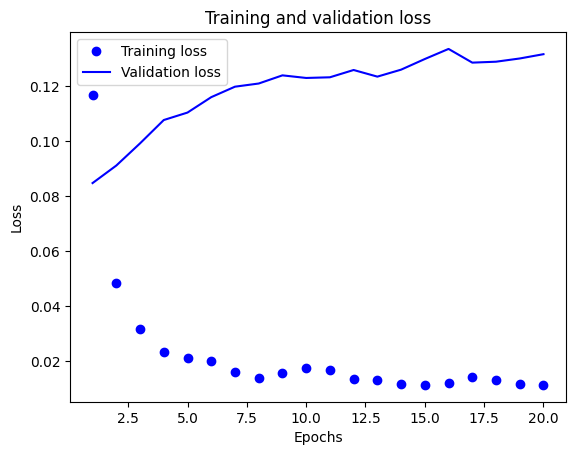

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

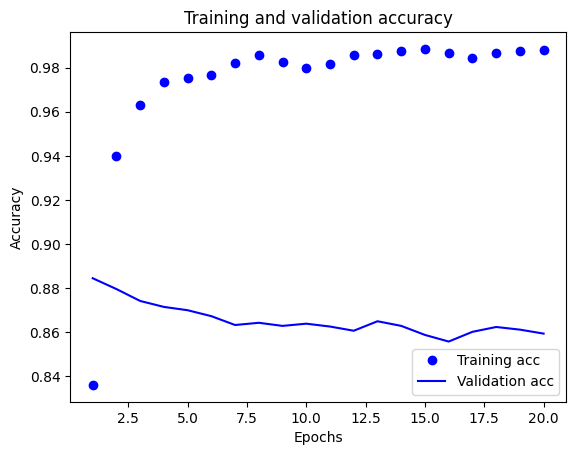

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8419 - loss: 0.1474


In [16]:
results


[0.1464294195175171, 0.8434799909591675]

In [17]:
## Libraries required for setting up an environment

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers

In [18]:
# Neural network implementation using 3 layered approach with a single dropout layer
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [20]:
## splitting the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# Train a neural network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5025 - loss: 4.0898 - val_accuracy: 0.5482 - val_loss: 1.7837
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5480 - loss: 1.8867 - val_accuracy: 0.6160 - val_loss: 1.2214
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5861 - loss: 1.2111 - val_accuracy: 0.7078 - val_loss: 0.9034
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6806 - loss: 0.8645 - val_accuracy: 0.8214 - val_loss: 0.6719
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8212 - loss: 0.6291 - val_accuracy: 0.8693 - val_loss: 0.4741
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9014 - loss: 0.4339 - val_accuracy: 0.8787 - val_loss: 0.3201
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9246 - loss: 0.2821 - val_accuracy: 0.8815 - val_loss: 0.2207
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9405 - loss: 0.1861 - val_accuracy: 0.8828 - v

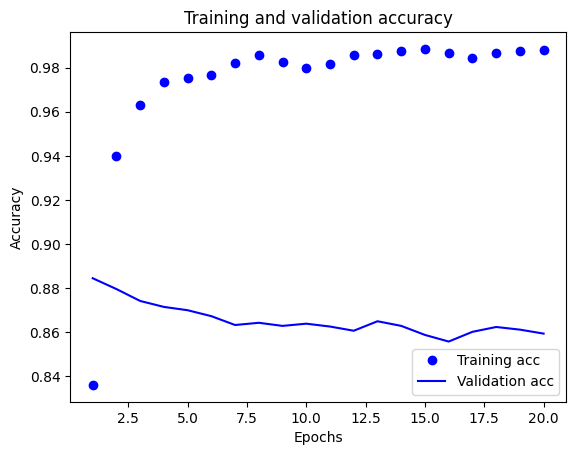

In [22]:
# plotting the Training and Validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
# Evaluating the results
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8524 - loss: 0.1265


[0.12447431683540344, 0.8550800085067749]